### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Determine missing data
data.info()

#Identify unique values in the car column
arr_cars = pd.unique(data["car"])
print(arr_cars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Based on data.info() call, the following columns are missing data:
- car: 108 non-null out of 12,684 possible records <br>
- Bar: 12,577 non-null out of 12,684 possible records <br>
- CoffeeHouse: 12,467 non-null out of 12,684 possible records <br>
- CarryAway: 12,533 non-null out of 12,684 possible records <br>
- RestaurantLessThan20: 12,554 non-null out of 12,684 possible records <br>
- Restaurant20to50: 12,495 non-null out of 12,684 possible records <br>

Conclusion: Interestingly, user attributes except for car and frequency of attendance to establishments are complete. There are 5 unique non-null car values:
- 'Scooter and motorcycle' <br>
- 'crossover' <br>
- 'Mazda5' <br>
- 'do not drive' <br>
- 'Car that is too old to install Onstar :D' <br>

Missing Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50 can be filled; relatively few records are missing, compared to the total number of records.

Car column will be dropped altogether. There is simply not enough non-null data to be of use, and including this column in the logic may be more misdirecting than informative. Missing records in the other columns will be replaced with the value "Unknown".

toCoupon_GEQXXmin - appears to indicate number of minutes out of the driver's way, within which the driver could arrive at the proposed establishment. If a proposal requires an estimated 25 minute detour (toCoupon_GEQ25min = 1), then the proposal would also require a 15 minute detour (toCoupon_GEQ15min = 1) and a 5 minute detour (toCoupon_GEQ5min = 1). Whereas, if a proposal only requires an estimated 15 minute or 5 minute detour, then the larger-time-limit categories would be False (value = 0).


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#Drop Car column to avoid confusion, and fill remaining missing values with "Unknown"
cleaned_data = data.fillna("Unknown").drop("car", axis=1)

#Rename "Y" column to be more descriptive.
cleaned_data.rename(columns={"Y": "Accepted Coupon?"}, inplace=True)

4. What proportion of the total observations chose to accept the coupon?



In [6]:
proportion = sum(cleaned_data["Accepted Coupon?"])/len(cleaned_data["Accepted Coupon?"])
print(str(np.round(proportion,4) * 100) + "% of observations accepted the coupon.")

56.84% of observations accepted the coupon.


5. Use a bar plot to visualize the `coupon` column.

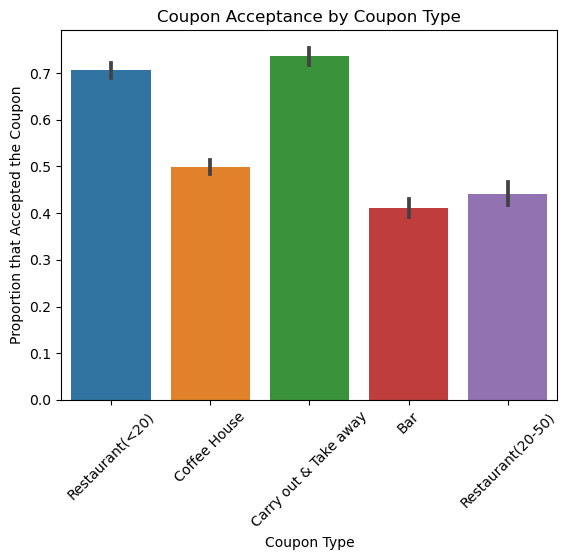

In [7]:
sns.barplot(cleaned_data, x="coupon", y="Accepted Coupon?")
plt.xticks(rotation=45)
plt.xlabel("Coupon Type")
plt.ylabel("Proportion that Accepted the Coupon")
plt.title("Coupon Acceptance by Coupon Type")
plt.show()

6. Use a histogram to visualize the temperature column.

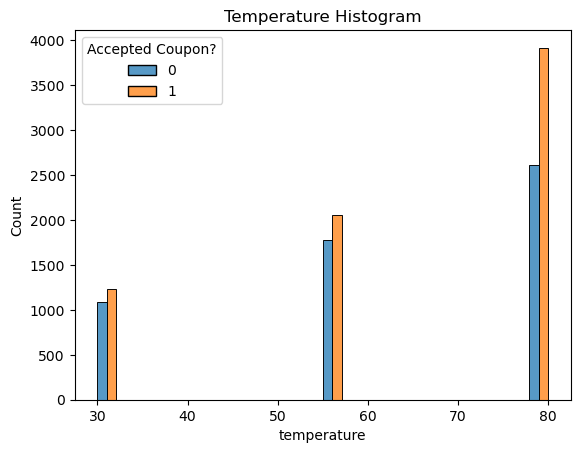

In [8]:
sns.histplot(cleaned_data, x="temperature", hue="Accepted Coupon?", multiple="dodge")
plt.title("Temperature Histogram")
plt.show()

In [9]:
# cat_coupon = sns.catplot(cleaned_data, kind="bar", x="coupon", y="Y", col="destination")
# cat_coupon.set_xticks(rotation=45)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
df_bar_only = cleaned_data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [11]:
proportion_bar = sum(df_bar_only["Accepted Coupon?"])/len(df_bar_only)
print(str(np.round(proportion_bar,4) * 100) + "% of bar coupons were accepted.")

41.0% of bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


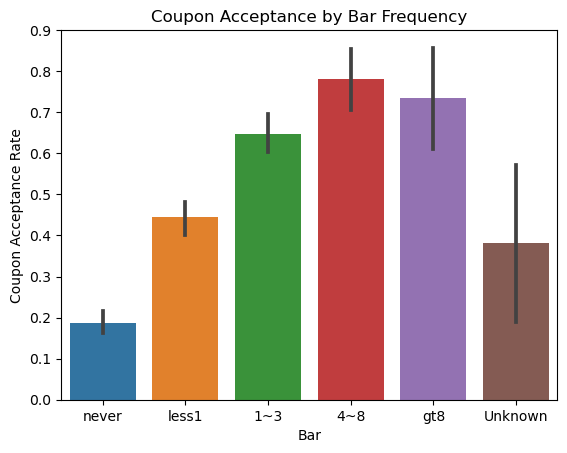

37.1% of those who went to a bar 3 or fewer times a month accepted their coupon.

76.9% of those who went to a bar more than 3 times a month accepted their coupon.

Unsurprisingly, customers who already frequented bars were almost twice as likely to accept a coupon than 
customers who typically frequented bars 3 or fewer times a month


In [78]:
#Visualize data with barplot
sns.barplot(df_bar_only, x="Bar", y="Accepted Coupon?", order = ["never", "less1", "1~3", "4~8", "gt8", "Unknown"])
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance by Bar Frequency")
plt.show()

#Determine proportion of coupons accepted by individuals who went to a bar 3 or fewer times a month
df_lessthan_3 = df_bar_only.query("Bar == 'never' | Bar == 'less1' | Bar == '1~3'")
proportion_lessthan3 = sum(df_lessthan_3["Accepted Coupon?"])/len(df_lessthan_3)
print(str(np.round(proportion_lessthan3,3) * 100) + 
      "% of those who went to a bar 3 or fewer times a month accepted their coupon.\n")

#Determine proportion of coupons accepted by individuals who went to a bar more than 3 times a month
df_morethan_3 = df_bar_only.query("Bar == '4~8' | Bar == 'gt8'")
proportion_morethan3 = sum(df_morethan_3["Accepted Coupon?"])/len(df_morethan_3)
print(str(np.round(proportion_morethan3,3) * 100) + 
     "% of those who went to a bar more than 3 times a month accepted their coupon.\n")

print("Unsurprisingly, customers who already frequented bars were almost twice as likely to accept a coupon than \n\
customers who typically frequented bars 3 or fewer times a month")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


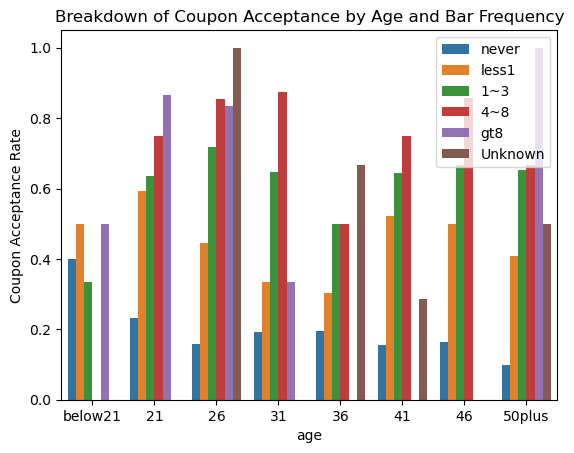

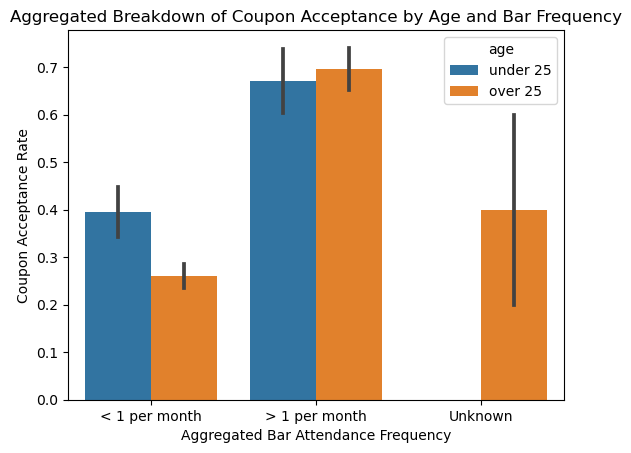

69.5% of those who go to a bar more than once a month and are over the age of 25 accept a coupon. 

33.4% of all others accepted their coupon. 



In [80]:
month_infreq = ["never", "less1"] 
under_25 = ["21", "below21"]
#Calculate acceptance rate among drivers who are in the subset of drivers who go to a bar more than once a month and are 
#over the age of 25.
df_25_month = df_bar_only.query("(Bar not in @month_infreq) & (age not in @under_25) & (Bar != 'Unknown')")
acceptance_25_month = sum(df_25_month["Accepted Coupon?"])/len(df_25_month)

#Calculate acceptance rate among drivers who are not in the subset of drivers who go to a bar more than once a month and
#are over the age of 25.
df_allothers = df_bar_only.query("((Bar in @month_infreq) | (age in @under_25)) & (Bar != 'Unknown')")
acceptance_allothers = sum(df_allothers["Accepted Coupon?"])/len(df_allothers)

#Removed Bar = 'Unknown' records from calculation proportions.

#Plot Bar graph
order_age = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
order_bar = ["never", "less1", "1~3", "4~8", "gt8", "Unknown"]
sns.barplot(df_bar_only, x="age", y="Accepted Coupon?", hue="Bar", order=order_age, hue_order = order_bar, errorbar=None)
plt.title("Breakdown of Coupon Acceptance by Age and Bar Frequency")
plt.legend(loc="upper right")
plt.ylabel("Coupon Acceptance Rate")
plt.show()

df_bar_agg = df_bar_only.copy()
bar_replace_dict = {"never": "< 1 per month", "less1": "< 1 per month", "1~3": "> 1 per month", "4~8": "> 1 per month",
                    "gt8": "> 1 per month", "Unknown": "Unknown"}
age_replace_dict = {"below21": "under 25", "21": "under 25", "26": "over 25", "31": "over 25", "36": "over 25", 
                    "41": "over 25", "46": "over 25", "50plus": "over 25"}
df_bar_agg["Bar"] = df_bar_only["Bar"].replace(bar_replace_dict)
df_bar_agg["age"] = df_bar_only["age"].replace(age_replace_dict)

sns.barplot(df_bar_agg, x="Bar", y="Accepted Coupon?", hue="age")
plt.title("Aggregated Breakdown of Coupon Acceptance by Age and Bar Frequency")
plt.xlabel("Aggregated Bar Attendance Frequency")
plt.ylabel("Coupon Acceptance Rate")
plt.show()
#Print Results
print(str(np.round(acceptance_25_month, 3)*100) + "% of those who go to a bar more than once \
a month and are over the age of 25 accept a coupon. \n")

print(str(np.round(acceptance_allothers, 3)*100) + "% of all others accepted their coupon. \n")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [90]:
month_infreq = month_infreq
not_passenger = ["Kid(s)", "Alone"]
not_occupation = ["Farming Fishing & Forestry"]
passenger_replace_dict = {"Alone": "No Passenger that was not a kid", "Kid(s)": "No Passenger that was not a kid",
                         "Friend(s)": "Had passenger that was not a kid", "Partner": "Had passenger that was not a kid"}

df_bar_q5criteria = df_bar_only.query("(Bar not in @month_infreq) & (passanger not in @not_passenger) & \
(occupation not in @not_occupation) & (Bar != 'Unknown')")

df_bar_notq5 = df_bar_only.query("~((Bar not in @month_infreq) & (passanger not in @not_passenger) & \
(occupation not in @not_occupation)) & (Bar != 'Unknown')")

acceptance_q5_criteria = sum(df_bar_q5criteria["Accepted Coupon?"])/len(df_bar_q5criteria)

acceptance_notq5 = sum(df_bar_notq5["Accepted Coupon?"])/len(df_bar_notq5)

print(str(np.round(acceptance_q5_criteria, 3)*100) + "% of drivers who go to bars more than once a month, \
had passengers that were not a kid, and \n had occupations other than farming, fishing, or forestry accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_notq5, 3)*100) + "% of all other drivers accepted their coupon.")

71.8% of drivers who go to bars more than once a month, had passengers that were not a kid, and 
 had occupations other than farming, fishing, or forestry accepted their coupon. 
 In contrast, 37.7% of all other drivers accepted their coupon.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [95]:
#Arrays for criteria corresponding to first bullet
month_infreq = month_infreq
not_passenger = not_passenger
not_marital = ["Widowed"]

df_bar_6_1 = df_bar_only.query("(Bar not in @month_infreq) & (passanger not in @not_passenger) & \
(maritalStatus not in @not_marital) & (Bar != 'Unknown')")
df_bar_not_6_1 = df_bar_only.query("~((Bar not in @month_infreq) & (passanger not in @not_passenger) & \
(maritalStatus not in @not_marital)) & (Bar != 'Unknown')")

#Calculate acceptance rates for drivers meeting the first bullet of criteria:
acceptance_6_1 = sum(df_bar_6_1["Accepted Coupon?"])/len(df_bar_6_1)
acceptance_not_6_1 = sum(df_bar_not_6_1["Accepted Coupon?"])/len(df_bar_not_6_1)

print(str(np.round(acceptance_6_1, 3)*100) + "% of drivers who go to bars more than once a month, \
had passengers that were not a kid, and \n were not widowed accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_not_6_1, 3)*100) + "% of all other drivers accepted their coupon.")

#Arrays for criteria corresponding to second bullet
month_infreq = month_infreq
under_30 = ["21", "below21", "26"]


df_bar_6_2 = df_bar_only.query("(Bar not in @month_infreq) & (age in @under_30) & (Bar != 'Unknown')")
df_bar_not_6_2 = df_bar_only.query("~((Bar not in @month_infreq) & (age in @under_30)) & (Bar != 'Unknown')")

#Calculate acceptance rates for drivers meeting the second bullet of criteria:
acceptance_6_2 = sum(df_bar_6_2["Accepted Coupon?"])/len(df_bar_6_2)
acceptance_not_6_2 = sum(df_bar_not_6_2["Accepted Coupon?"])/len(df_bar_not_6_2)

print(str(np.round(acceptance_6_2, 3)*100) + "% of drivers who go to bars more than once a month, \
and are under the age of 30 accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_not_6_2, 3)*100) + "% of all other drivers accepted their coupon.")

#Arrays for criteria corresponding to third bullet
cheap_food = ["4~8", "gt8"]
low_income = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

df_bar_6_3 = df_bar_only.query("(RestaurantLessThan20 in @cheap_food) & (income in @low_income)")
df_bar_not_6_3 = df_bar_only.query("~((RestaurantLessThan20 in @cheap_food) & (income in @low_income))")

#Calculate acceptance rates for drivers meeting the third bullet of criteria:
acceptance_6_3 = sum(df_bar_6_3["Accepted Coupon?"])/len(df_bar_6_3)
acceptance_not_6_3 = sum(df_bar_not_6_3["Accepted Coupon?"])/len(df_bar_not_6_3)

print(str(np.round(acceptance_6_3, 4)*100) + "% of drivers who go to cheap restaurants more than 4 times a month, \
and make less than $50,000 accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_not_6_3, 3)*100) + "% of all other drivers accepted their coupon.")

71.8% of drivers who go to bars more than once a month, had passengers that were not a kid, and 
 were not widowed accepted their coupon. 
 In contrast, 37.7% of all other drivers accepted their coupon.
72.2% of drivers who go to bars more than once a month, and are under the age of 30 accepted their coupon. 
 In contrast, 34.5% of all other drivers accepted their coupon.
45.35% of drivers who go to cheap restaurants more than 4 times a month, and make less than $50,000 accepted their coupon. 
 In contrast, 40.1% of all other drivers accepted their coupon.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who already go to bars routinely and do not have young children are significantly more likely to accept coupons. The relationship between age and coupon acceptance needs to be further investigated, as in an earlier bar graph, it appears that coupon acceptance could be independent of age and is more directly tied to how frequently the driver already goes to bars.

On the flip side, drivers who are on a limited budget, surmised from their frequenting of cheap restaurants and low income, are significantly less likely to accept bar coupons.

### Independent Investigation - Coffee House Coupons

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

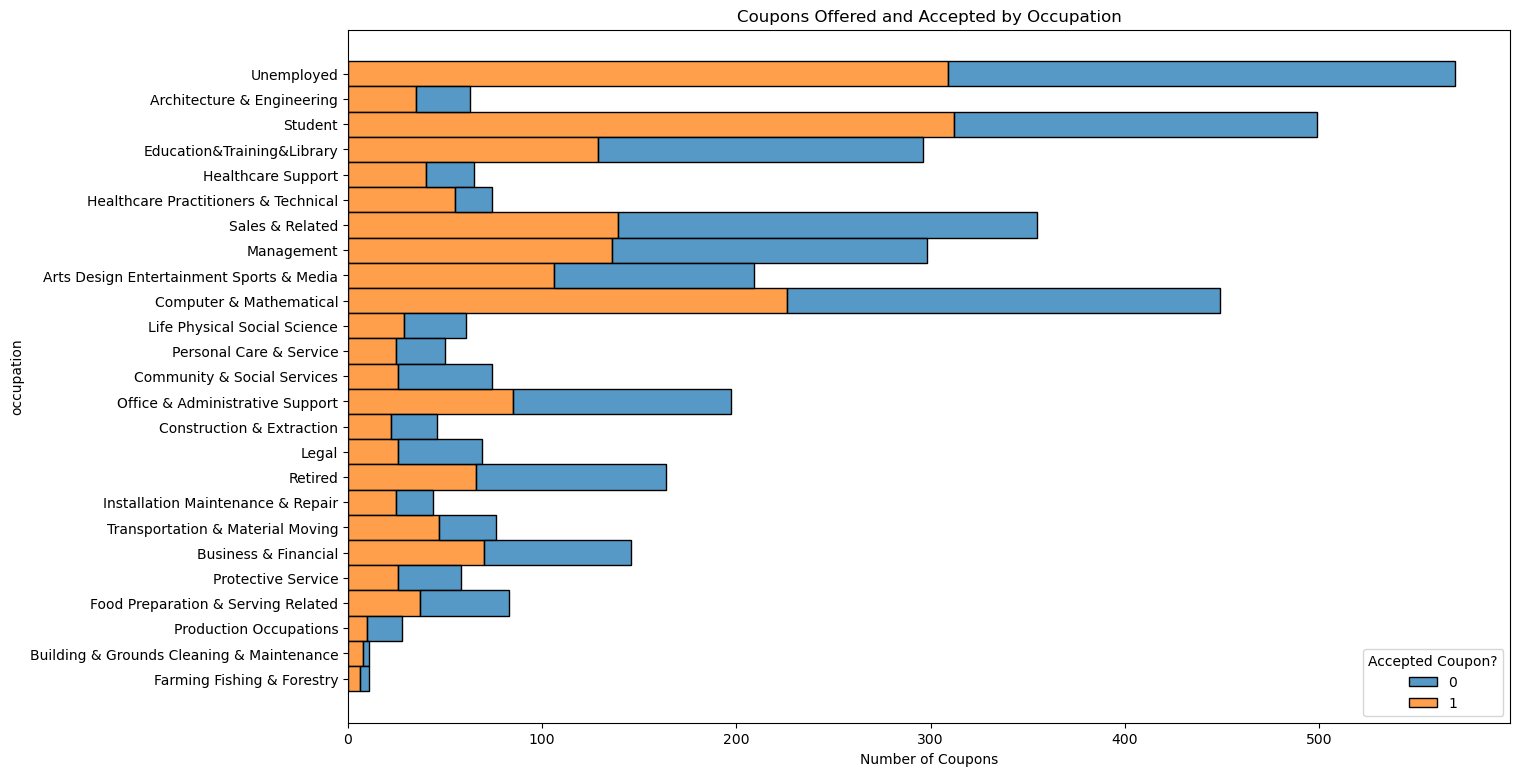

In [119]:
filter_coupongroup = "Coffee House"
df_coffee_only = cleaned_data.query("coupon == @filter_coupongroup")

#Variables of interest: time, age, education, occupation, CoffeeHouse

#Visualization by Occupation
plt.figure(figsize=(15,9))
sns.histplot(df_coffee_only, y="occupation", hue="Accepted Coupon?", multiple="stack")
plt.title("Coupons Offered and Accepted by Occupation")
plt.xlabel("Number of Coupons")
plt.show()
#Looks like the top 3 occupations of interest by volume are: 
#'Unemployed', 'Student', 'Computer & Mathematical', 'Healthcare Practitioners & Technical'

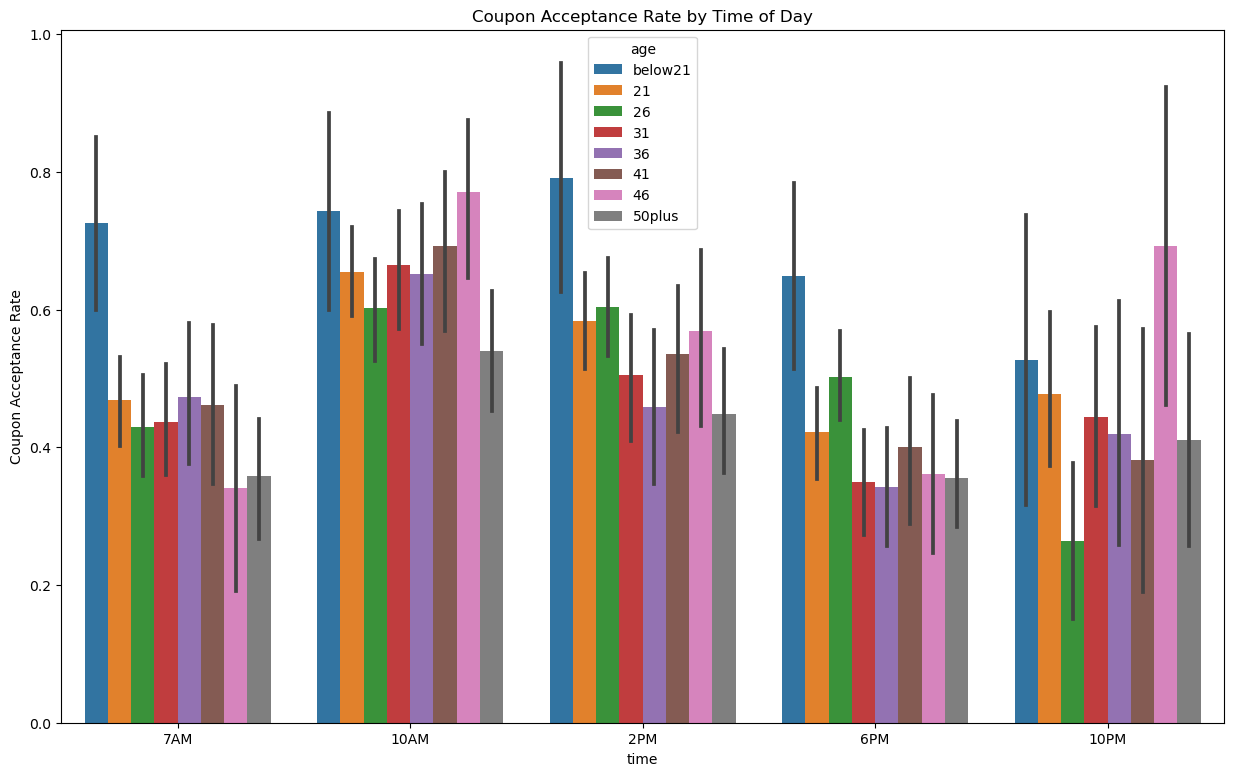

In [126]:
#Acceptance Rate at Different times of day
order_time = ["7AM", "10AM", "2PM", "6PM", "10PM"]
order_age = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
plt.figure(figsize=(15,9))
sns.barplot(df_coffee_only, x="time", y="Accepted Coupon?", hue = "age", order=order_time, hue_order = order_age)
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate by Time of Day")
plt.show()
#Time ranges of highest interest: 10AM and 2PM; age groups of interest: below21, 26

60.0% of drivers between 10AM and 6PM accepted their coupon. 
 In contrast, 43.0% of all other drivers accepted their coupon.

67.0% of drivers who were unemployed, students or worked in the Computer or Math professions between 10AM and 6PM accepted their coupon. 
 In contrast, 47.0% of all other drivers accepted their coupon.

53.0% of drivers under 30 accepted their coupon. 
 In contrast, 43.0% of all other drivers accepted their coupon.



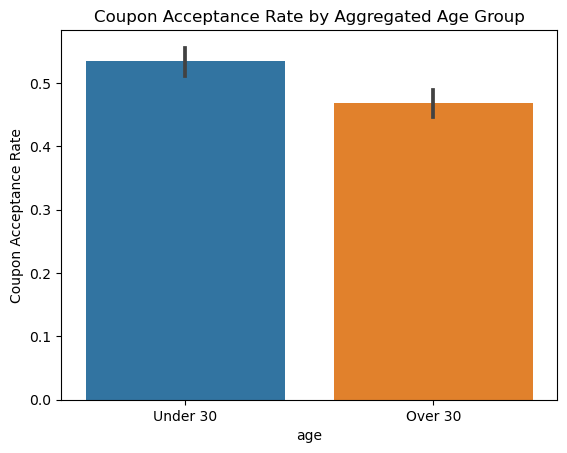

In [143]:
#Population Cross-Sections of interest
time_filter = ["10AM", "2PM"]
age_filter = ["below21", "21", "26"]
occupation_filter = ["Unemployed", "Student", "Computer & Mathematical"]

#Acceptance Rate Based on time dimension only
df_time_only = df_coffee_only.query("time in @time_filter")
acceptance_time = sum(df_time_only["Accepted Coupon?"])/len(df_time_only)
df_not_time = df_coffee_only.query("time not in @time_filter")
acceptance_not_time = sum(df_not_time["Accepted Coupon?"])/len(df_not_time)

print(str(np.round(acceptance_time, 2)*100) + "% of drivers between 10AM and 6PM accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_not_time, 2)*100) + "% of all other drivers accepted their coupon.\n")

#Acceptance Rate Based on time and occupation
df_time_occ = df_coffee_only.query("(time in @time_filter) & (occupation in @occupation_filter)")
acceptance_timeocc = sum(df_time_occ["Accepted Coupon?"])/len(df_time_occ)
df_not_timeocc = df_coffee_only.query("~((time in @time_filter) & (occupation in @occupation_filter))")
acceptance_not_timeocc = sum(df_not_timeocc["Accepted Coupon?"])/len(df_not_timeocc)

print(str(np.round(acceptance_timeocc, 2)*100) + "% of drivers who were unemployed, students or worked \
in the Computer or Math professions between 10AM and 6PM accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_not_timeocc, 2)*100) + "% of all other drivers accepted their coupon.\n")

#Acceptance Rate Based on time dimension only
df_age_only = df_coffee_only.query("age in @age_filter")
acceptance_age = sum(df_age_only["Accepted Coupon?"])/len(df_age_only)
df_not_age = df_coffee_only.query("age not in @age_filter")
acceptance_not_age = sum(df_not_age["Accepted Coupon?"])/len(df_not_age)

print(str(np.round(acceptance_age, 2)*100) + "% of drivers under 30 accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_not_time, 2)*100) + "% of all other drivers accepted their coupon.\n")

#Consolidate age into 2 groups
df_coffee_aggage = df_coffee_only.copy()
age_dict = {"below21": "Under 30", "21": "Under 30", "26": "Under 30", "31": "Over 30", "36": "Over 30",
           "41": "Over 30", "46": "Over 30", "50plus": "Over 30"}
df_coffee_aggage["age"] = df_coffee_only["age"].replace(age_dict)
sns.barplot(df_coffee_aggage, x="age", y="Accepted Coupon?")
plt.title("Coupon Acceptance Rate by Aggregated Age Group")
plt.ylabel("Coupon Acceptance Rate")
plt.show()

In [146]:
#Criteria 1:
#below 21 and at 10AM
df_crit1 = df_coffee_only.query("(age == 'below21') & (time == '10AM')")
acceptance_crit1 = sum(df_crit1["Accepted Coupon?"])/len(df_crit1)
df_not_crit1 = df_coffee_only.query("~((age == 'below 21') & (time == '10AM'))")
acceptance_no_crit1 = sum(df_not_crit1["Accepted Coupon?"])/len(df_not_crit1)

print(str(np.round(acceptance_crit1, 2)*100) + "% of drivers who under 21 between 10AM and 2PM accepted their coupon. \
\n In contrast, " + str(np.round(acceptance_no_crit1, 2)*100) + "% of all other drivers accepted their coupon.\n")

74.0% of drivers who under 21 between 10AM and 2PM accepted their coupon. 
 In contrast, 50.0% of all other drivers accepted their coupon.

